# LSTM
(Long Short-term Memory) is a more refined and complete version of RNN which lets us solve the problem of vanishing gradient descent

## Imports

***mount drive***

In [2]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


***general imports***

In [3]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
import math 

***sklearn imports***

In [4]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

***keras imports***

In [5]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

## Load Data

***load data from .csv file***

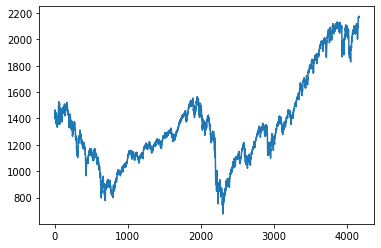

In [6]:
dataset_path = "/content/drive/MyDrive/Youtube/7 - LSTM/dataset/sp500.csv"

dataset = pd.read_csv(dataset_path, usecols=[0], engine="python", skipfooter=3)

plt.plot(dataset)
plt.show()

## Pre-Process Data

***scale data***

In [7]:
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

***train/test split***

In [8]:
train_size = int(len(dataset)*0.67)
test_size = len(dataset) - train_size

dataset_train, dataset_test = dataset[0: train_size, :], dataset[train_size:len(dataset), :]
print(len(dataset_train), len(dataset_test))

2791 1376


***checking values of dataset***

In [9]:
dataset

array([[0.48240909],
       [0.48420417],
       [0.48509838],
       ...,
       [0.99562893],
       [0.99609603],
       [0.99436106]])

***function - creating time series***

In [10]:
def create_timeseries(dataset, look_back=1):
  X_data, y_data = [], []
  
  # looping over all of the data
  for i in range(len(dataset) - look_back - 1):

    # takign data segments 
    temp_data = dataset[i:(i+look_back), 0]

    # adding the data segment to our X_data
    X_data.append(temp_data)

    # next data after data segment above
    next_data = dataset[i + look_back, 0]

    # adding the data to our y_data
    y_data.append(next_data)

  return np.array(X_data), np.array(y_data)

***use the function to create a time series***

In [11]:
look_back = 1
X_train, y_train = create_timeseries(dataset_train, look_back)
X_test, y_test = create_timeseries(dataset_test, look_back)

***check dimensions***

In [12]:
y_train.shape

(2789,)

***reshape input: (number of samples, number of time steps, number of features)***

In [13]:
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

## Build Model Architecture

***we create the LSTM network***

In [14]:
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 4)                 96        
                                                                 
 dense (Dense)               (None, 1)                 5         
                                                                 
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________


## Compile and Train Model

***compile model***

In [15]:
model.compile(loss="mean_squared_error", optimizer="adam")

***fit model to data***

In [16]:
model.fit(X_train, y_train, epochs=100, batch_size=10, verbose=2)

Epoch 1/100
279/279 - 10s - loss: 0.0248 - 10s/epoch - 35ms/step
Epoch 2/100
279/279 - 2s - loss: 0.0052 - 2s/epoch - 6ms/step
Epoch 3/100
279/279 - 2s - loss: 0.0027 - 2s/epoch - 6ms/step
Epoch 4/100
279/279 - 1s - loss: 0.0011 - 1s/epoch - 5ms/step
Epoch 5/100
279/279 - 2s - loss: 3.2026e-04 - 2s/epoch - 6ms/step
Epoch 6/100
279/279 - 2s - loss: 1.4700e-04 - 2s/epoch - 8ms/step
Epoch 7/100
279/279 - 2s - loss: 1.2529e-04 - 2s/epoch - 6ms/step
Epoch 8/100
279/279 - 2s - loss: 1.2309e-04 - 2s/epoch - 6ms/step
Epoch 9/100
279/279 - 1s - loss: 1.2252e-04 - 1s/epoch - 4ms/step
Epoch 10/100
279/279 - 1s - loss: 1.2139e-04 - 929ms/epoch - 3ms/step
Epoch 11/100
279/279 - 1s - loss: 1.2137e-04 - 920ms/epoch - 3ms/step
Epoch 12/100
279/279 - 1s - loss: 1.2016e-04 - 887ms/epoch - 3ms/step
Epoch 13/100
279/279 - 1s - loss: 1.1890e-04 - 907ms/epoch - 3ms/step
Epoch 14/100
279/279 - 1s - loss: 1.1919e-04 - 917ms/epoch - 3ms/step
Epoch 15/100
279/279 - 1s - loss: 1.1779e-04 - 911ms/epoch - 3ms/step

## Evaluate Model Performance

***evaluate model performance using test data***

In [17]:
model.evaluate(X_test, y_test)

43/43 [==============================] - 1s 2ms/step - loss: 4.8747e-04


0.00048746835091151297

***root mean square error (RMSE) score calculation
***

In [18]:
# prediction of the model over the train/test data
predict_train = model.predict(X_train)
predict_test = model.predict(X_test)

# inverse scaling for X 
predict_train = scaler.inverse_transform(predict_train)
predict_test = scaler.inverse_transform(predict_test)

# inverse scaling for y 
y_train = scaler.inverse_transform([y_train])
y_test = scaler.inverse_transform([y_test])

# train/test RMSE score
train_score = math.sqrt(mean_squared_error(y_train[0], predict_train[:, 0]))
test_score = math.sqrt(mean_squared_error(y_test[0], predict_test[:, 0]))

print("Train score: %.2f RMSE" % (train_score))
print("Test score: %.2f RMSE" % (test_score))

43/43 [==============================] - 0s 2ms/step
Train score: 15.29 RMSE
Test score: 33.08 RMSE


***plotting results***

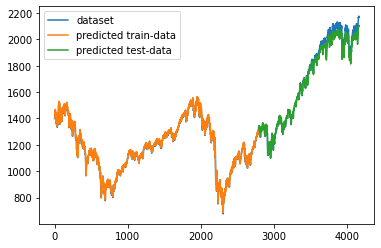

In [23]:
# values of predicted train_data 
predict_train_plot = np.empty_like(dataset)
predict_train_plot[:, :] = np.nan
predict_train_plot[look_back:len(predict_train)+look_back, :] = predict_train

# values of predicted test_data
predict_test_plot = np.empty_like(dataset)
predict_test_plot[:, :] = np.nan
predict_test_plot[len(predict_train)+(look_back*2)+1:len(dataset)-1, :] = predict_test

# plotting the whole dataset
plt.plot(scaler.inverse_transform(dataset)) 
plt.plot(predict_train_plot)
plt.plot(predict_test_plot)

plt.legend(["dataset", "predicted train-data", "predicted test-data"])

plt.show()